In [172]:

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, r2_score
from sklearn.preprocessing import LabelEncoder

In [147]:
data = pd.read_csv('/content/student_performance_synthetic.csv')

In [148]:

label_encoder_gender = LabelEncoder()
label_encoder_socio = LabelEncoder()
label_encoder_extra = LabelEncoder()

In [149]:

data['Gender'] = label_encoder_gender.fit_transform(data['Gender'])
data['Socio-economic Status'] = label_encoder_socio.fit_transform(data['Socio-economic Status'])
data['Extracurricular'] = label_encoder_extra.fit_transform(data['Extracurricular'])

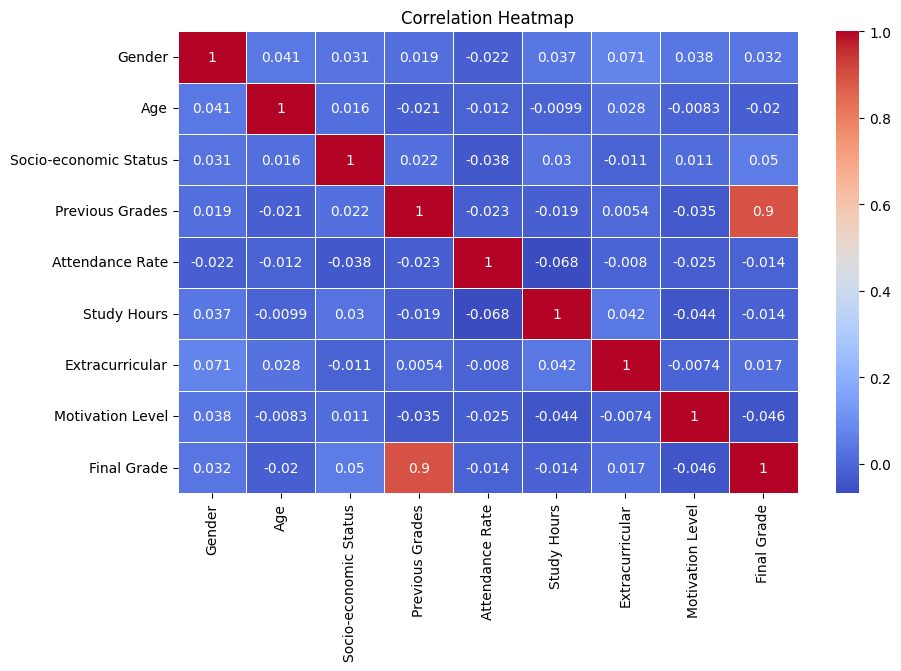

In [150]:

plt.figure(figsize=(10, 6))
sns.heatmap(data.corr(), annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()

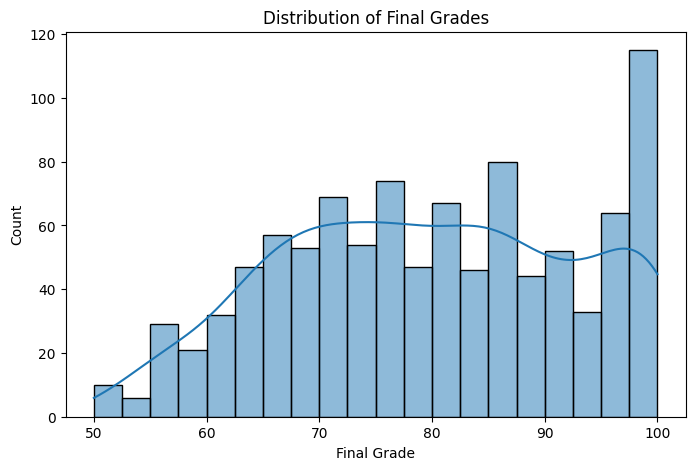

In [151]:

plt.figure(figsize=(8, 5))
sns.histplot(data['Final Grade'], bins=20, kde=True)
plt.title('Distribution of Final Grades')
plt.show()

In [152]:

X = data.drop(columns=['Final Grade'])
y = data['Final Grade']

In [153]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [154]:

model = LinearRegression()
model.fit(X_train, y_train)


LinearRegression()

In [155]:
y_pred = model.predict(X_test)

In [156]:
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f"Mean Absolute Error: {mae}")
print(f"R^2 Score: {r2}")

Mean Absolute Error: 4.876615404833823
R^2 Score: 0.7939047162675057


In [164]:
def predict_grade(input_data):

    input_df = pd.DataFrame([input_data], columns=X.columns)


    predicted_grade = model.predict(input_df)[0]


    plt.figure(figsize=(6, 4))
    sns.barplot(x=["Predicted Final Grade"], y=[predicted_grade])
    plt.ylim(0, 100)
    plt.title(f"Predicted Final Grade: {predicted_grade:.2f}")
    plt.show()

    return predicted_grade

Please input the following details:
Gender (Male/Female): male
Age: 20
Socio-economic Status (Low/Medium/High): low
Previous Grades (out of 100): 80
Attendance Rate (percentage, 0-100): 86
Study Hours (per week): 11
Extracurricular (Yes/No): yes
Motivation Level (1-10): 3


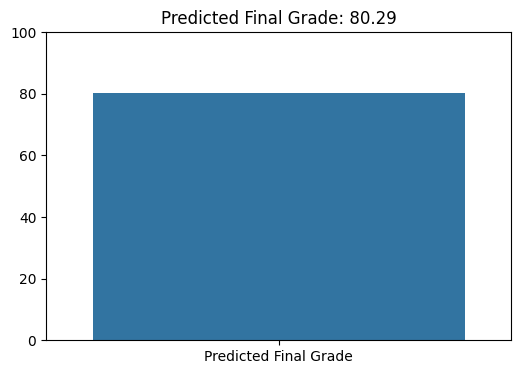

Predicted Final Grade: 80.29057146739713


In [163]:
def get_user_inputs():
    print("Please input the following details:")


    gender_input = input("Gender (Male/Female): ").strip().title()
    gender_encoded = label_encoder_gender.transform([gender_input])[0]


    age_input = int(input("Age: "))


    socio_input = input("Socio-economic Status (Low/Medium/High): ").strip().title()
    socio_encoded = label_encoder_socio.transform([socio_input])[0]


    previous_grades = float(input("Previous Grades (out of 100): "))


    attendance_rate = float(input("Attendance Rate (percentage, 0-100): "))


    study_hours = float(input("Study Hours (per week): "))


    extra_input = input("Extracurricular (Yes/No): ").strip().title()
    extra_encoded = label_encoder_extra.transform([extra_input])[0]


    motivation_level = float(input("Motivation Level (1-10): "))


    input_data = {
        'Gender': gender_encoded,
        'Age': age_input,
        'Socio-economic Status': socio_encoded,
        'Previous Grades': previous_grades,
        'Attendance Rate': attendance_rate,
        'Study Hours': study_hours,
        'Extracurricular': extra_encoded,
        'Motivation Level': motivation_level
    }

    return input_data

# Get inputs from the user
user_input = get_user_inputs()

# Predict and visualize
predicted_grade = predict_grade(user_input)
print(f"Predicted Final Grade: {predicted_grade}")
